#### Understanding Time series data:

Time series data is generally univariate data. It is characterized by the univariate variable being dependent on itself. Time is the implicit variable in the time series data. Therefore, time series data can be considered as a sequence of observations arranged in sorted ascending order of time. Time series forecasting is set of methods to learn for the time series so that the future (extrapolated) values can be predicted. The following guidelines may be followed when dealing with time series data.

1.	Depending on how far into future you need to predict collect sufficient historical data. Thumb rule is to have at least 50 stable observations and better is 100 obs.  
2.	The time series analysis is worthless, unless past is a reasonably true representative of future.
3.	Please note the word ‘stable’ the point 1 above. You must use that part of time series that does not have abrupt jumps (shocks), outliers, missing values and extreme volatility. 
4.	Have domain knowledge on dynamics of the subject area so as to assess how far into future you can project become uncontrolled variables and uncertainty become predominant.
5.	Many times, prediction itself affects the observation. One example is stock market. The market reacts to the newly predicted information and adjusts itself to counter it.

#### Time series and Python: 
Python has a rich library of methods and object types to handle and process time series data. In order to use the methods effectively we need to make raw data recognized by python as time series data. So, we need to index the data as time series data by proper time stamping. This and other aspects of time series processing will be explained at appropriate time during the lab session.
Time series packages in Python
The following packages are required to analyze time series data.

•	pandas (datetime(), Series)
•	statsmodels (acf, pacf, ARIMA, adfuller, seasonal_decompose, durbin_watson)
•	matplotlib
•	sklearn (LinearRegression)
•	seaborn(pair_plot)

#### Load Required packages:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

from pandas import Series, read_csv, DataFrame, concat, Grouper, TimeGrouper
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from statsmodels.stats.stattools import durbin_watson
from datetime import datetime

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
sns.set()
%matplotlib inline

import os
# os.chdir('C:/Users/Sid/Desktop/TimeSeries/Day1/Faculty_Notebook')

#### Time stamping the data:
The first step in time series analysis is to timestamp the series. If we usually import data into python via ‘csv’ files. Then the data frame created would contain a string data type column in the form
•	dd-mm-yy or dd-mm-yyyy for daily observations
•	mm-yy or mm-yyyy for monthly observations
•	yy or yyyy for yearly observations
•	(of course we can  also have hourly and minute-wise data also)

Creating a time object and time stamping Time series data.
    read data file (File: Reliance India Stock price file name: relindsp.xlsx )
    use parser to interpret string date properly  
    set date as index to the series


In [3]:
parser = lambda date: pd.datetime.strptime(date, '%d-%m-%Y')

relind = pd.read_excel('relindsp.xlsx', parse_dates=['date'], date_parser = parser, index_col='date')

In [4]:
print(relind.head())
print(type(relind))
print(relind.info())
print(relind.index[0:10])

                sprice
date                  
2011-01-02  553.667363
2011-01-03  707.065312
2011-01-04  657.651882
2011-01-05  812.190262
2011-01-06  529.852229
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2087 entries, 2011-01-02 to 2018-12-31
Data columns (total 1 columns):
sprice    2087 non-null float64
dtypes: float64(1)
memory usage: 32.6 KB
None
DatetimeIndex(['2011-01-02', '2011-01-03', '2011-01-04', '2011-01-05',
               '2011-01-06', '2011-01-09', '2011-01-10', '2011-01-11',
               '2011-01-12', '2011-01-13'],
              dtype='datetime64[ns]', name='date', freq=None)


Using date index we can filter data by year, month, date or for a specific period. These operations are shown below:

In [5]:
# Filter data for february, 2013
relind['2-2013']

,sprice
date,
2013-02-03,2304.129883
2013-02-04,2964.477994
2013-02-05,3082.420590
2013-02-06,2728.649359
2013-02-07,2826.729016
2013-02-10,2406.187091
2013-02-11,2691.650242
2013-02-12,2118.578772
2013-02-13,2629.118895


In [6]:
# Filter data for the full year 2013

relind['2013']

,sprice
date,
2013-01-01,2336.697144
2013-01-02,2567.746356
2013-01-03,2970.052353
2013-01-06,2875.461487
2013-01-07,2430.124514
2013-01-08,2509.669617
2013-01-09,2387.243846
2013-01-10,2059.399641
2013-01-13,3083.951884


In [7]:
# Filter data for a specific date (eg: 2013-1-31)

relind['2013-1-31':'2013-1-31']

,sprice
date,
2013-01-31,3502.618043


We can also get group summaries like mean, standard deviation, variance, max, min etc for a given year, month or any period between two dates.

In [8]:
# use summary functions to get summariae data

print(relind['2013-1-31':'2013-1-31'].sprice)
print(relind['2013-2'].sprice.mean())
print(relind['2013'].sprice.max())
print(relind['2013' : '2015'].sprice.min())
print(relind['2013'].sprice.std())

date
2013-01-31    3502.618043
Name: sprice, dtype: float64
2623.516578995169
4485.8558643840315
2052.8803071490993
409.801644896091


we can also use resample method to get monthly averages for a given year. Or yearly average for whole data set. Note that this operation takes the daily data for the grouping period and computes the average or the required statistic.

In [11]:
# use resample method to get monthly averages for a given year. 
# Use 'M', 'Q', 'Y' as resample parameter for
# month, quarter or year respectively. 

print(relind['2013'].sprice.resample('M').mean())
print(relind.sprice.resample('A').mean()) # A for annual

date
2013-01-31    2703.192436
2013-02-28    2623.516579
2013-03-31    2619.245935
2013-04-30    2807.946289
2013-05-31    2916.875320
2013-06-30    2906.443495
2013-07-31    3080.658834
2013-08-31    3069.215815
2013-09-30    3187.185973
2013-10-31    3436.649572
2013-11-30    3369.779350
2013-12-31    3408.075524
Freq: M, Name: sprice, dtype: float64
date
2011-12-31    1160.722798
2012-12-31    2108.239438
2013-12-31    3014.867249
2014-12-31    3923.460761
2015-12-31    4872.335102
2016-12-31    5728.765374
2017-12-31    6747.895394
2018-12-31    7594.882962
Freq: A-DEC, Name: sprice, dtype: float64


In [12]:
# Notice that above displays last date of the month or year. 
# We can change the subscript to first day by using 
# MS, QS or YS instead of M, Q, Y respectively.

print(relind['2013'].sprice.resample('MS').mean())
print(relind['2014':'2015'].sprice.resample('QS').mean())

date
2013-01-01    2703.192436
2013-02-01    2623.516579
2013-03-01    2619.245935
2013-04-01    2807.946289
2013-05-01    2916.875320
2013-06-01    2906.443495
2013-07-01    3080.658834
2013-08-01    3069.215815
2013-09-01    3187.185973
2013-10-01    3436.649572
2013-11-01    3369.779350
2013-12-01    3408.075524
Freq: MS, Name: sprice, dtype: float64
date
2014-01-01    3572.364159
2014-04-01    3793.138729
2014-07-01    4017.878002
2014-10-01    4297.848286
2015-01-01    4527.930061
2015-04-01    4687.444108
2015-07-01    5059.914643
2015-10-01    5200.813699
Freq: QS-JAN, Name: sprice, dtype: float64


We demonstate below the strptime function to split a datetime variable into its components such as date, month, year, hour, minute, second etc.

In [13]:
dt = datetime.strptime('sep/19/18 13:55:26','%b/%d/%y %H:%M:%S')

print(dt.date()) # complete date
print(dt.time()) # only time details
print(dt.day)    # date alone
print(dt.month)  # month alone
print(dt.year)   # year alone

2018-09-19
13:55:26
19
9
2018


Please recall that time series data is a single variable indexed by time. Many Time Series Analysis methods use the variable in the form of series. We do this for relind['sprice'] variable below.    

In [14]:
series = Series(relind.sprice)

**Time Series Visualization** is a very important preliminary activity in time series model building. Visually inspecting the time series and observe the pattern and anomolies, if any makes us decide what forecasting method to use and how to handle anamolies seen in the data. In the following steps we will demonstate how to analyze time series data graphically. For this purpose, we will use Matplotlib and seaborn packages. Please load these libraries before proceeding if not already done so (i.e. if you are restarting the session after break.)

Text(0.5, 1.0, 'Reliance Daily Stock Price \n From 2011 to 2018')

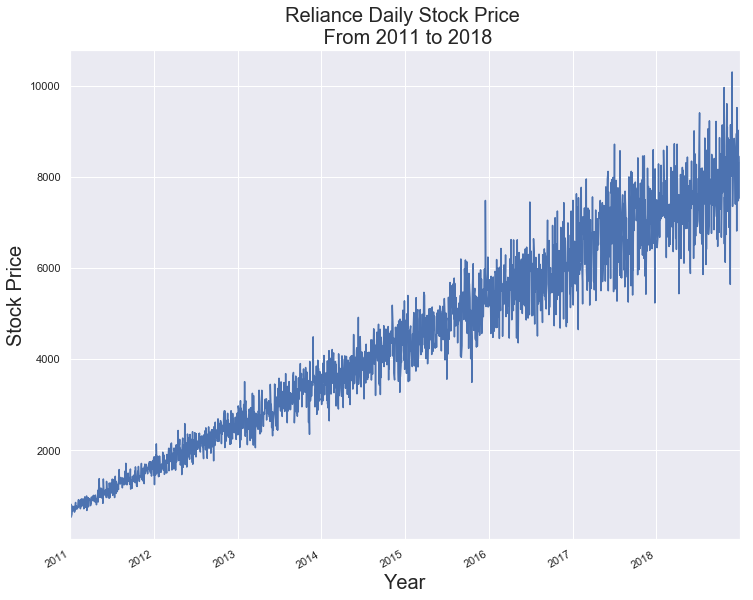

In [15]:
# visualizing time series

# plot the time series data

series.plot(figsize=(12,10))
plt.xlabel('Year', fontsize=20)
plt.ylabel('Stock Price', fontsize=20)
plt.title('Reliance Daily Stock Price \n From 2011 to 2018', fontsize=20)

             1            2            3            4            5   \
0   2336.697144  2304.129883  2544.942924  2859.256117  3117.088456   
1   2567.746356  2964.477994  2384.717769  2619.469800  2950.690590   
2   2970.052353  3082.420590  2718.363010  3143.690814  3026.924159   
3   2875.461487  2728.649359  3246.869761  3313.576491  3124.654054   
4   2430.124514  2826.729016  2775.565397  3055.899299  2660.444895   
5   2509.669617  2406.187091  2109.599189  2355.168487  3041.494716   
6   2387.243846  2691.650242  3196.252934  2775.862380  3054.488150   
7   2059.399641  2118.578772  2840.852634  2374.446321  2939.136156   
8   3083.951884  2629.118895  2446.583072  2695.358587  2804.714360   
9   2219.979867  2694.409358  2843.371196  2408.352393  2909.262255   
10  2560.191492  2454.667224  2716.055152  2916.408628  2800.101151   
11  2917.286669  2779.296710  2184.629833  3312.959988  3082.229702   
12  2565.702922  2500.218876  2052.880307  3022.133918  2729.931652   
13  27

Text(0.5, 1.0, 'Box Plot \n Reliance Month-wise Stock Price')

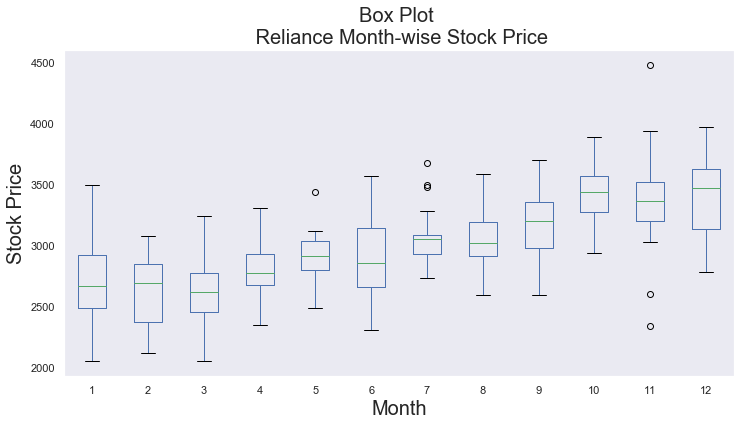

In [16]:
# visualize monthly boxplots for 2013

sprice13 = series['2013']

# split yearly data as groups of monthly data

mgrps13 =  sprice13.groupby(Grouper(freq='M'))

# concatenate monthly data as columns of a dataframe

mprice13 = concat([DataFrame(x[1].values) for x in mgrps13], axis=1)
mprice13 = DataFrame(mprice13)

# add column names 

mprice13.columns = range(1,13)

print (mprice13)

# plot the box plot

mprice13.boxplot(grid=False, figsize=(12,6))
plt.xlabel('Month', fontsize=20)
plt.ylabel('Stock Price', fontsize=20)
plt.title('Box Plot \n Reliance Month-wise Stock Price', fontsize=20)


Text(0.5, 1.0, 'Box Plot \n Reliance Year-wise Stock Price')

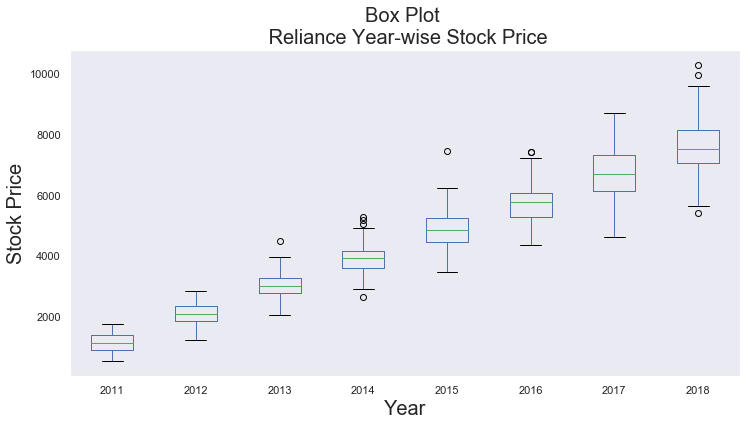

In [17]:
# Group the data by year, then plot the box plot 

ygrps = series.groupby(Grouper(freq='A')) 
ygrps.groups

yprice = concat([DataFrame(x[1].values) for x in ygrps], axis=1)
yprice = DataFrame(yprice)

# add column names 

yprice.columns = range(2011, 2019)

yprice.boxplot(grid=False, figsize=(12,6))
plt.xlabel('Year', fontsize=20)
plt.ylabel('Stock Price', fontsize=20)
plt.title('Box Plot \n Reliance Year-wise Stock Price', fontsize=20)

<Figure size 864x648 with 0 Axes>

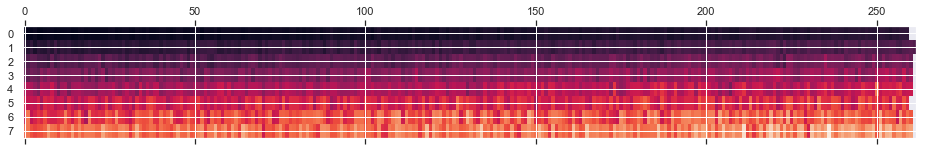

In [18]:
# year-wise heatmap
plt.figure(figsize=(12,9))
yprice = yprice.T
plt.matshow(yprice, interpolation=None, aspect='auto')

Time Series Analysis of Retail Food Store Data (file name = retailfoodstore.csv). In this file the period is in two columns namely, month and year. so we need to parse date accordingly. See the code below:

In [20]:
rfstore = pd.read_csv("retailfoodstore.csv", parse_dates = [['year', 'month']], index_col=0)

print(rfstore.head())
print(rfstore.info())
print(rfstore.index[0:20])

            revenue
year_month         
1992-01-01   164083
1992-02-01   164260
1992-03-01   163747
1992-04-01   164759
1992-05-01   165617
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 310 entries, 1992-01-01 to 2017-10-01
Data columns (total 1 columns):
revenue    310 non-null int64
dtypes: int64(1)
memory usage: 4.8 KB
None
DatetimeIndex(['1992-01-01', '1992-02-01', '1992-03-01', '1992-04-01',
               '1992-05-01', '1992-06-01', '1992-07-01', '1992-08-01',
               '1992-09-01', '1992-10-01', '1992-11-01', '1992-12-01',
               '1993-01-01', '1993-02-01', '1993-03-01', '1993-04-01',
               '1993-05-01', '1993-06-01', '1993-07-01', '1993-08-01'],
              dtype='datetime64[ns]', name='year_month', freq=None)


Text(0.5, 1.0, 'Line Plot of Food Store Revenue')

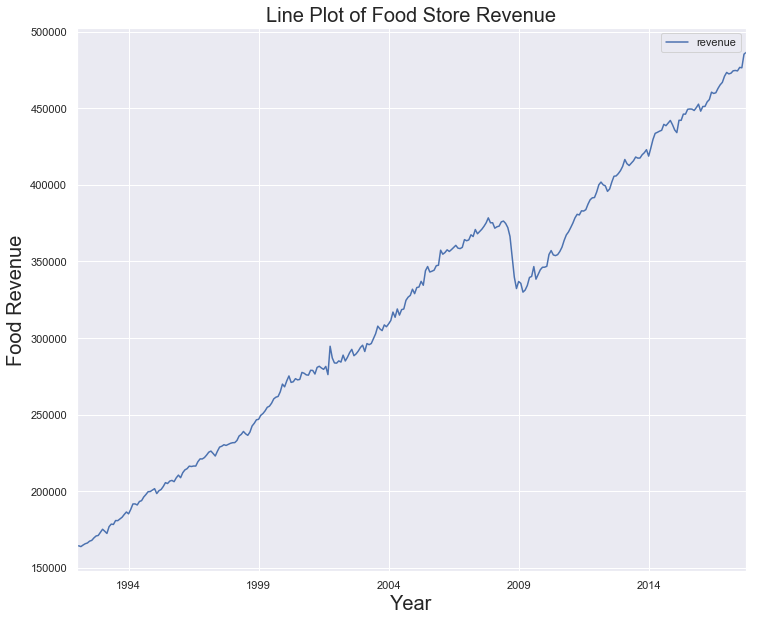

In [21]:
# now plot the series

rfstore.plot(figsize=(12,10))
plt.xlabel('Year', fontsize = 20)
plt.ylabel('Food Revenue', fontsize = 20)
plt.title('Line Plot of Food Store Revenue', fontsize= 20)

Recall the discussion on trend in the class earlier today. Presence of trend indicates non-stationarity and time series analysis is not possible when trend is present. So we need to detrend the data. Thsi can be done by creating a series with y value at time t as difference between value at time t and value at t-1. This operation is demonstrated below: 

In [22]:
# we are using diff() function to detrend the data.

rev = rfstore.revenue
revdiff = rev.diff()
revdiff.head()

year_month
1992-01-01       NaN
1992-02-01     177.0
1992-03-01    -513.0
1992-04-01    1012.0
1992-05-01     858.0
Name: revenue, dtype: float64

Notice the NaN at row 0. A 'NaN' is not allowed in time series data, Therefore we will drop this observation.

In [23]:
revdiff.dropna(inplace=True)
revdiff.head()

year_month
1992-02-01     177.0
1992-03-01    -513.0
1992-04-01    1012.0
1992-05-01     858.0
1992-06-01     481.0
Name: revenue, dtype: float64

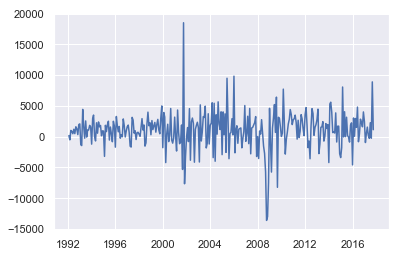

In [24]:
# Now plot the difference series

plt.plot(revdiff) 
plt.show()

# Notice that the series has become stationary and the mean is about 0.

In the following example we look at tractor sales data. The relevant file is tractorsales.csv. In this file, notice that year is given in yy-Mon format. We will demonstate below how to handle this variable.

In [26]:
# tractor sale example

tractor = pd.read_csv('tractorsales.csv')
tractor.head()

# year month format is different
# we need to convert the same
# let us create separate year month columns
# and combine them

,year-month,No_Sold
0,03-Jan,141
1,03-Feb,157
2,03-Mar,185
3,03-Apr,199
4,03-May,203


In [27]:
# import calender package for following functions to work.
# define date index, number of periods being equal to length of the data set.

dates = pd.date_range(start='2003-01-01', freq='MS', periods=len(tractor))
dates

# create month and year columns separately. 

tractor['month'] = dates.month
tractor['year'] = dates.year

tractor.head()

,year-month,No_Sold,month,year
0,03-Jan,141,1,2003
1,03-Feb,157,2,2003
2,03-Mar,185,3,2003
3,03-Apr,199,4,2003
4,03-May,203,5,2003


In the following steps, we are going to clean up the table. 
1.  Drop the column 'year-month'.
2.  Rename the columns properly.
3.  Make dates as the index for the table
4.  Create a series of 'Tractors_sold' with time as index.

In [28]:
tractor.drop(['year-month'], axis=1, inplace=True)
tractor.rename(columns={'No_Sold':'tractors_sold'}, inplace=True)
tractor = tractor[['month', 'year', 'tractors_sold']]
tractor.index = dates
tractor = tractor[['tractors_sold']]
tractor.head()

,tractors_sold
2003-01-01,141
2003-02-01,157
2003-03-01,185
2003-04-01,199
2003-05-01,203


Text(0.5, 1.0, 'Tractor sales from 2003 to 2014')

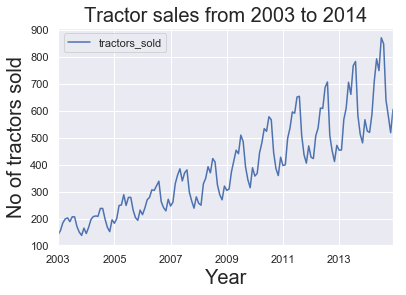

In [29]:
# plot tractor sales

tractor.plot()
plt.xlabel('Year', fontsize=20)
plt.ylabel('No of tractors sold', fontsize=20)
plt.title("Tractor sales from 2003 to 2014", fontsize=20)

-------------------------------------------- End of Lab ----------------------------------------------